___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten ,Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print('training dataset:',len(X_train))
print('test dataset:',len(X_test))

training dataset: 60000
test dataset: 10000


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[1].shape

(28, 28)

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

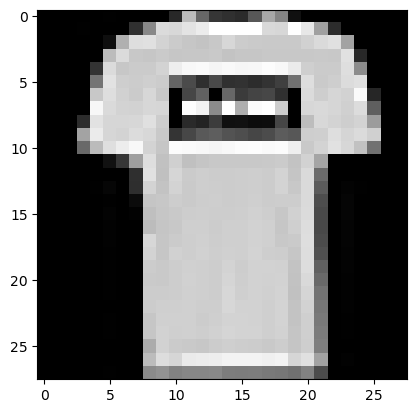

In [8]:
plt.imshow(X_train[1], cmap="gray")

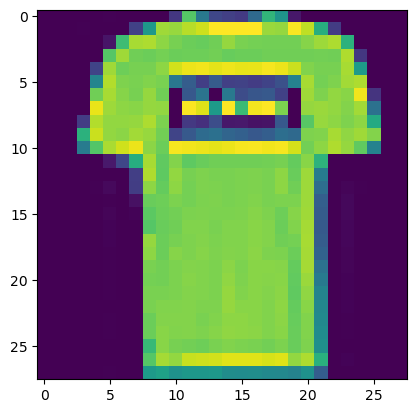

In [9]:
plt.imshow(X_train[1])

<Axes: >

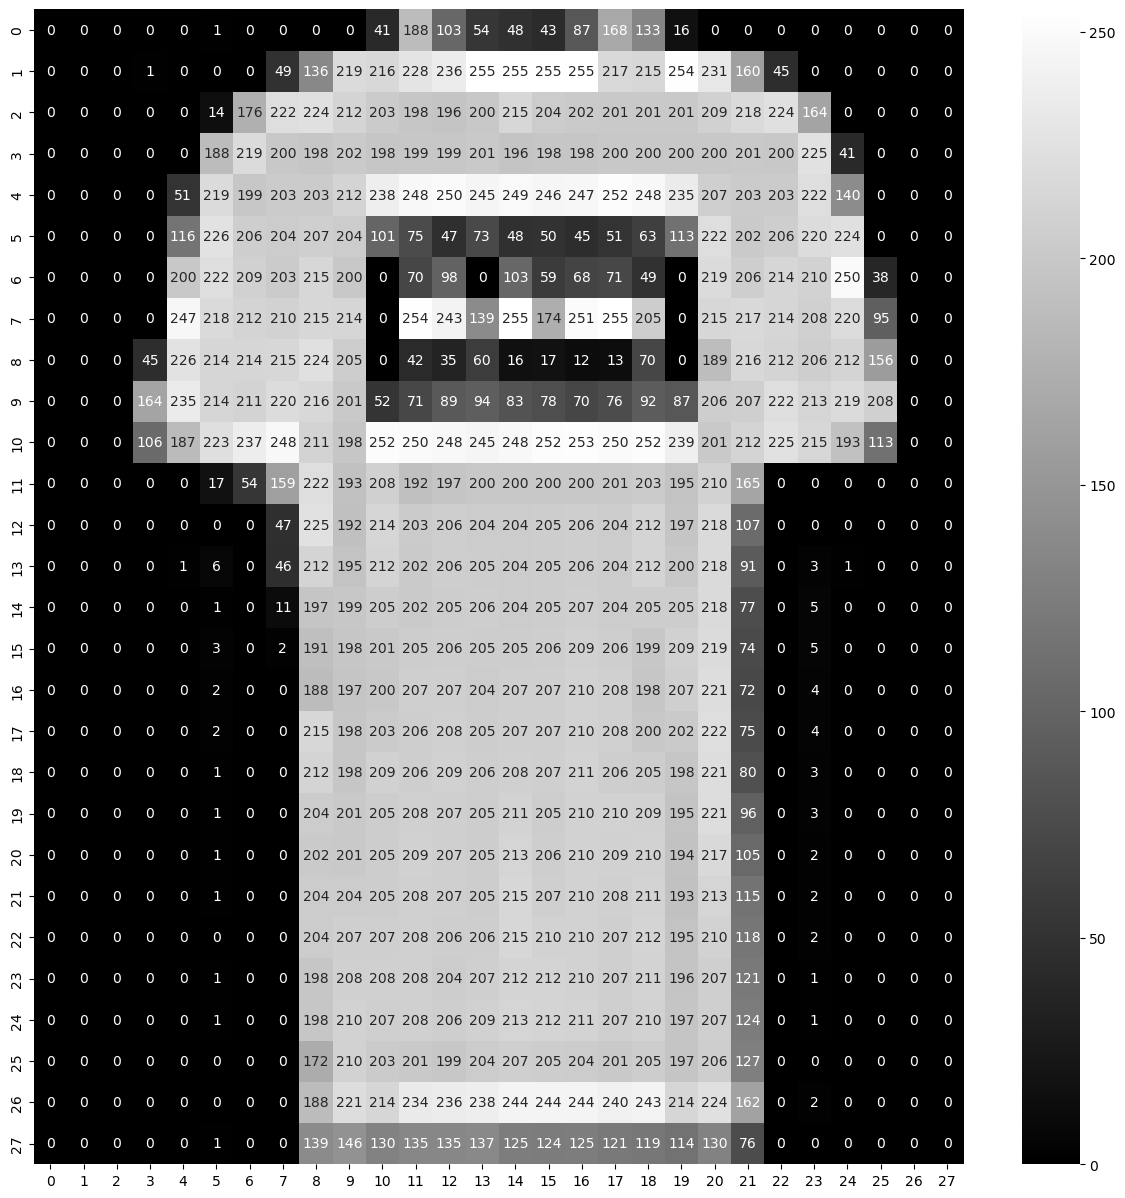

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[1], annot=True, cmap="gray", fmt=".3g")

<Axes: >

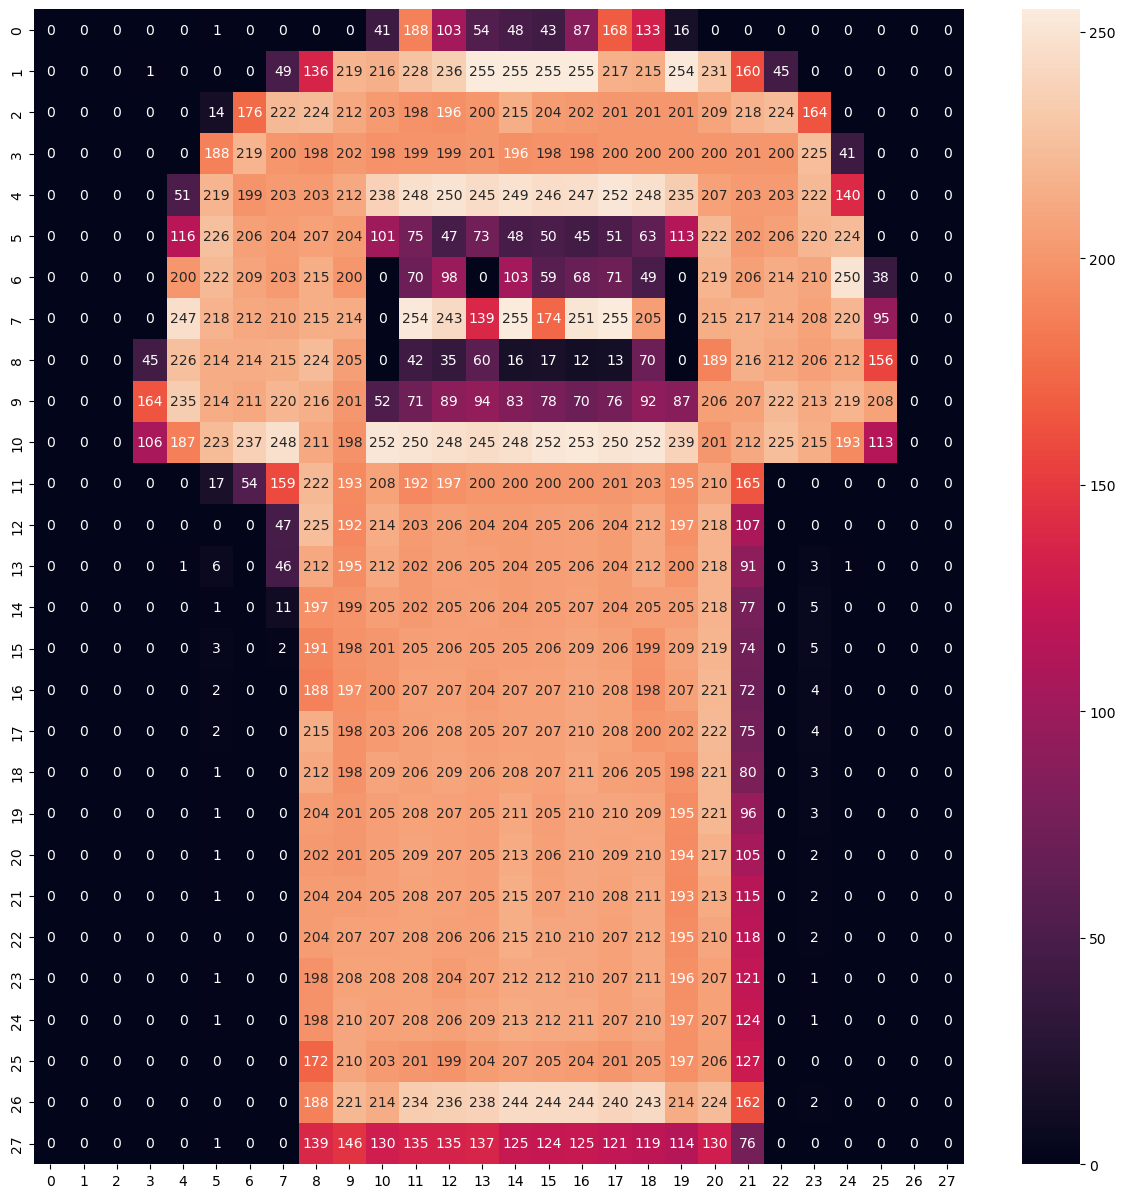

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[1], annot=True, fmt=".3g")

In [12]:
y_train[1]

0

In [13]:
y_train.shape

(60000,)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

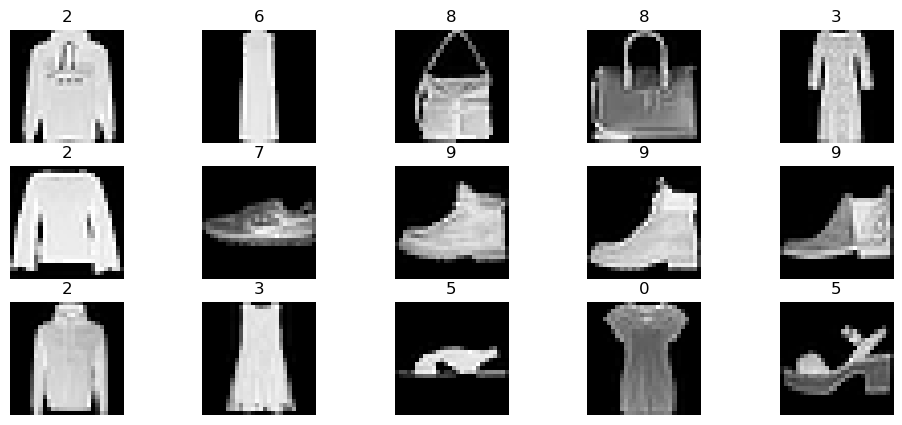

In [16]:
f, axes = plt.subplots(3, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

Text(0.5, 1.0, 'cluster : 1')

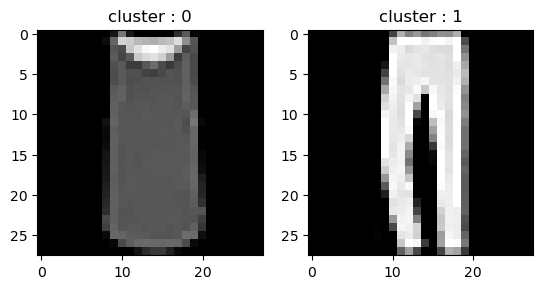

In [17]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[2], cmap='gray')
plt.title("cluster : {}".format(y_train[2]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[2], cmap='gray')
plt.title("cluster : {}".format(y_test[2]))

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [18]:
print(X_train[342].min())
print(X_train[9].max())

0
255


In [19]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [21]:
print(X_train.shape)
print(X_test.shape) 

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [22]:
y_train[1]

0

In [23]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [24]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
print(Y_train.shape)
print(Y_test.shape) 

(60000, 10)
(10000, 10)


# methods

In [26]:
def vis(model):
    summary = pd.DataFrame(model.history.history)
    print(summary.head())
    print("--------------------------------------------------------\n")
    
    summary.plot()
    plt.title("History of model")
    plt.show();
    
    summary[["loss", "val_loss"]].plot()
    plt.title("loss VS val_loss")
    plt.show();
    
    summary[["accuracy", "val_accuracy"]].plot()
    plt.title("accuracy VS val_accuracy")
    plt.show();

In [27]:
def evalt(model,y_test):

    pred_prob = model.predict(X_test)
    y_pred = np.argmax(pred_prob, axis=1)

    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------------")

    plt.figure(figsize=(9, 5))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Blues",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
    plt.title("prediction")
    plt.show();
    print("\n")
    equal = np.equal(y_test, y_pred).sum()
    not_equal= np.not_equal(y_test, y_pred).sum()
    plt.bar(['equal','not_equal'] , [equal,not_equal] )
    plt.title("Correct prediction VS wrong prediction")
    plt.show();

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")) 
model.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [30]:
early_stop = EarlyStopping( monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True)

In [31]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4027 - accuracy: 0.8578 - val_loss: 0.3169 - val_accuracy: 0.8881
Epoch 2/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2709 - accuracy: 0.9027 - val_loss: 0.2743 - val_accuracy: 0.9004
Epoch 3/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2242 - accuracy: 0.9161 - val_loss: 0.2673 - val_accuracy: 0.9033
Epoch 4/30
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1919 - accuracy: 0.9294 - val_loss: 0.2728 - val_accuracy: 0.9021
Epoch 5/30
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1657 - accuracy: 0.9386 - val_loss: 0.2540 - val_accuracy: 0.9090
Epoch 6/30
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1411 - accuracy: 0.9482 - val_loss: 0.2643 - val_accuracy: 0.9156
Epoch 7/30
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1209 - accuracy: 0.9556 - val_loss: 0.2733 -

**TASK 7: Plot values of metrics you used in your model.**

   loss  accuracy  val_loss  val_accuracy
0 0.403     0.858     0.317         0.888
1 0.271     0.903     0.274         0.900
2 0.224     0.916     0.267         0.903
3 0.192     0.929     0.273         0.902
4 0.166     0.939     0.254         0.909
--------------------------------------------------------



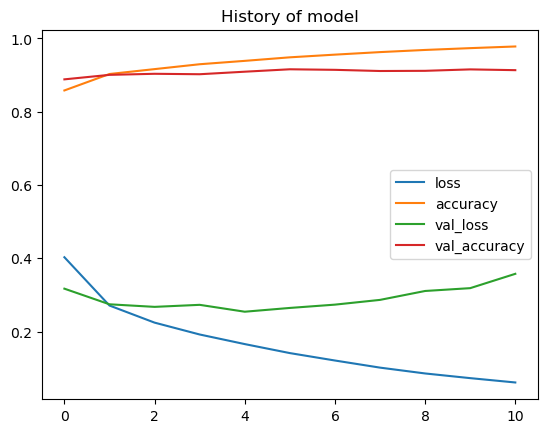

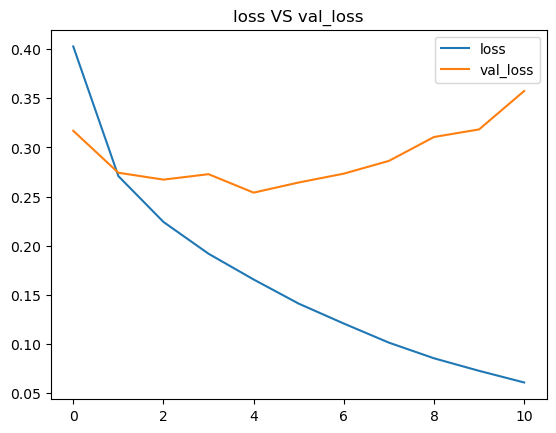

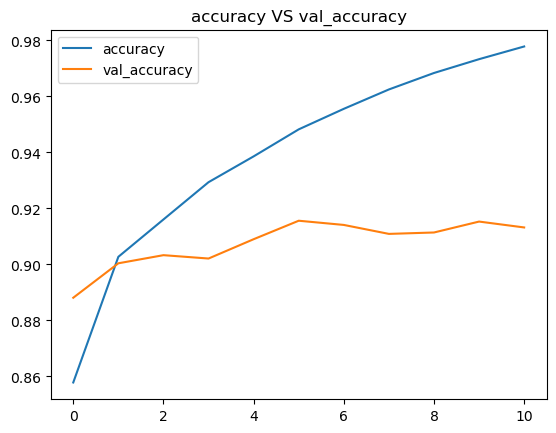

In [32]:
vis(model)

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26434406638145447
Test accuracy: 0.9156000018119812


313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.94      0.89      0.91      1000
           4       0.80      0.93      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.80      0.70      0.75      1000
           7       0.97      0.96      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

-------------------------------------------------------------


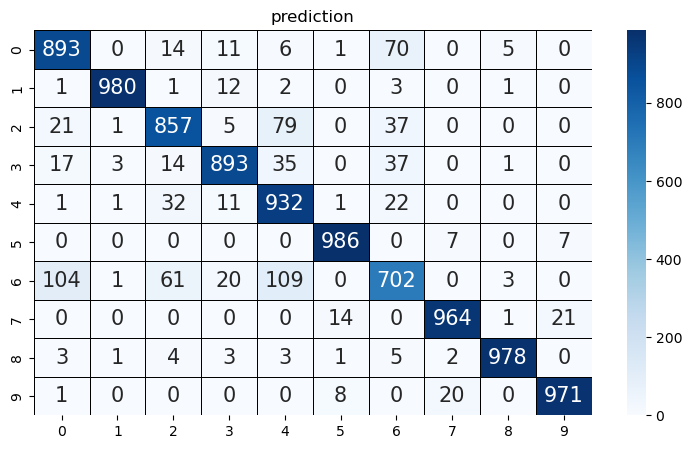

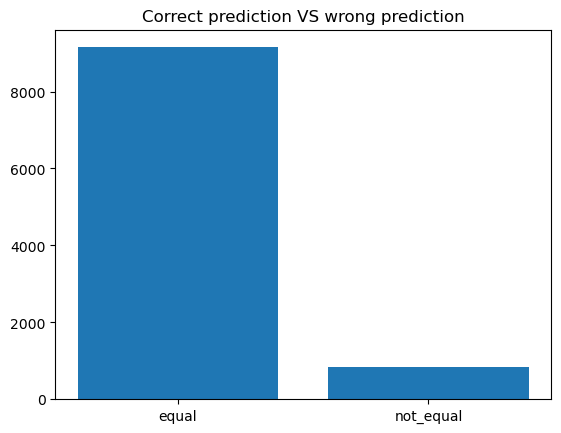

In [34]:
evalt(model,y_test)

# Conclusion
- Although the results are good, the overfitting is clear at the graph, as the training curve rises and the test curve decreases

# Modelling-2

### To solve the overfitting problem, I add some layers and use a Dropout layer

## Create the model

In [126]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [127]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

##  Model Training 

In [128]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/30
1875/1875 [==============================] - 105s 55ms/step - loss: 0.7582 - accuracy: 0.7186 - val_loss: 0.5042 - val_accuracy: 0.8153
Epoch 2/30
1875/1875 [==============================] - 98s 52ms/step - loss: 0.5150 - accuracy: 0.8146 - val_loss: 0.4276 - val_accuracy: 0.8502
Epoch 3/30
1875/1875 [==============================] - 102s 54ms/step - loss: 0.4479 - accuracy: 0.8371 - val_loss: 0.3835 - val_accuracy: 0.8630
Epoch 4/30
1875/1875 [==============================] - 97s 52ms/step - loss: 0.4192 - accuracy: 0.8491 - val_loss: 0.3609 - val_accuracy: 0.8659
Epoch 5/30
1875/1875 [==============================] - 103s 55ms/step - loss: 0.4008 - accuracy: 0.8551 - val_loss: 0.3470 - val_accuracy: 0.8732
Epoch 6/30
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3833 - accuracy: 0.8608 - val_loss: 0.3502 - val_accuracy: 0.8706
Epoch 7/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3745 - accuracy: 0.8635 - val_loss: 0.335

## Model Evaluation


   loss  accuracy  val_loss  val_accuracy
0 0.758     0.719     0.504         0.815
1 0.515     0.815     0.428         0.850
2 0.448     0.837     0.383         0.863
3 0.419     0.849     0.361         0.866
4 0.401     0.855     0.347         0.873
--------------------------------------------------------



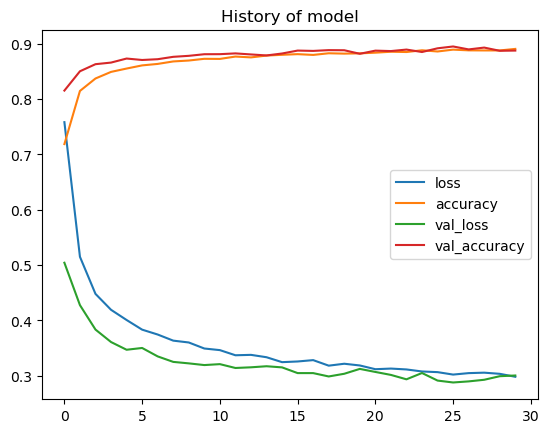

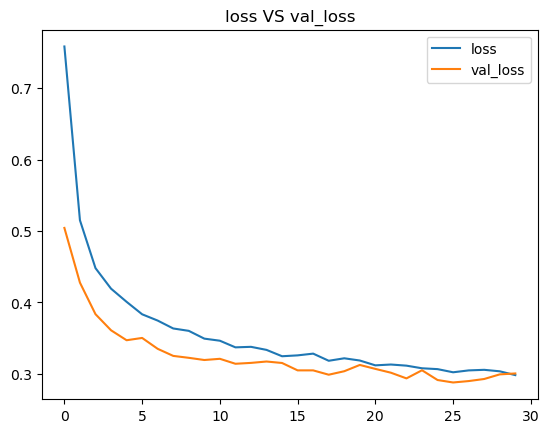

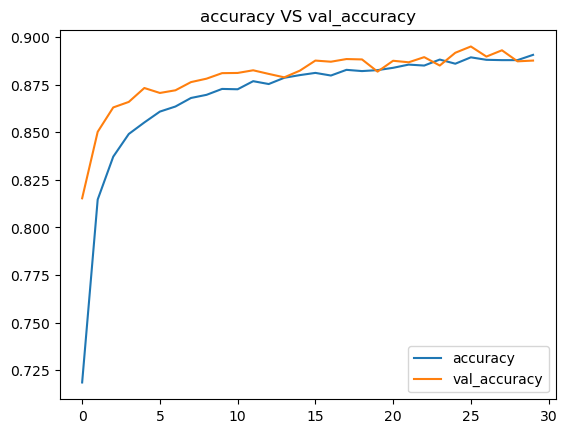

In [129]:
vis(model)

In [130]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3004855215549469
Test accuracy: 0.8876000046730042


313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.89      0.89      0.89      1000
           4       0.83      0.73      0.78      1000
           5       0.98      0.97      0.98      1000
           6       0.64      0.74      0.68      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

-------------------------------------------------------------


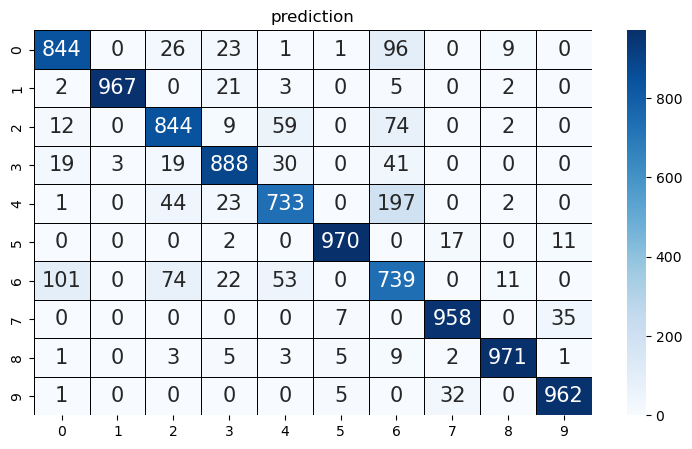

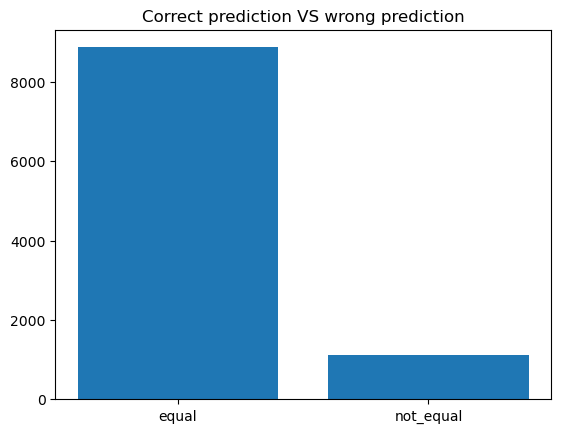

In [131]:
evalt(model,y_test)

# Conclusion
- The overfitting problem has been solved and the results are good.
- There is confusion between the 0(T-shirt/top),2(Pullover) 4(Coat)and 6(Shirt) <br>
  class due to the similarity between them, as they all under the name of "top clothes"

# Save model

In [132]:
model.save("cnn-cloths.h5")

# load model

In [133]:
model = load_model("cnn-cloths.h5")

## Prediction

class 1 which is Trouser


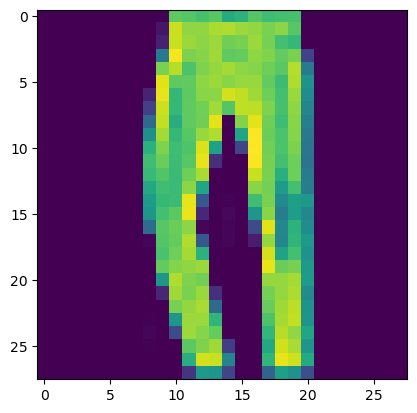

In [134]:
print("class" , y_test[5] ,"which is",classes[y_test[5]] )
plt.imshow(X_test[5])

In [135]:
pred_single = model.predict(np.expand_dims(X_test[5], 0))

1/1 [==============================] - 0s 84ms/step


In [136]:
np.argmax(pred_single)

1

real class is Trouser and pridect calss as Trouser


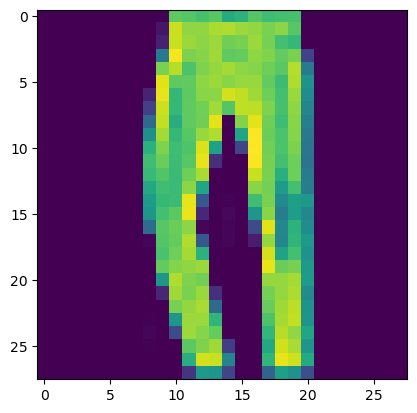

In [137]:
print("real class is", classes[y_test[5]] ,"and pridect calss as",classes[np.argmax(pred_single)])
plt.imshow(X_test[5].reshape(28, 28))
plt.show()

In [138]:
pred = model.predict(X_test)
pred = np.argmax(np.round(pred),axis=1)

313/313 [==============================] - 3s 10ms/step


Found 8781 correct labels out of 10000


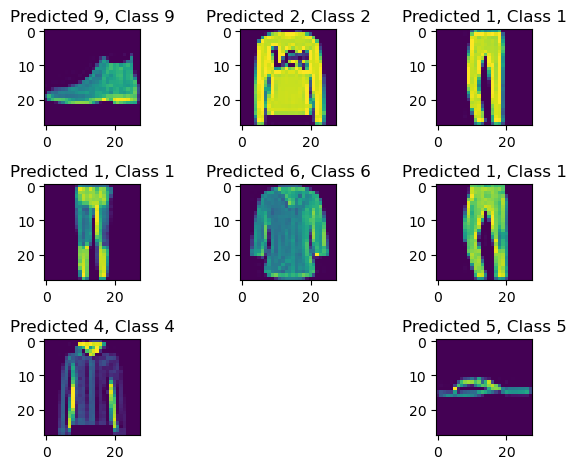

In [139]:
correct = np.where(pred==y_test)[0]
print ("Found %d correct labels" % len(correct),"out of 10000")
for i, correct in enumerate(correct[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(X_test[correct].reshape(28,28),  interpolation='none')
 plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
 plt.tight_layout()


Found 1219 not correct labels out of 10000


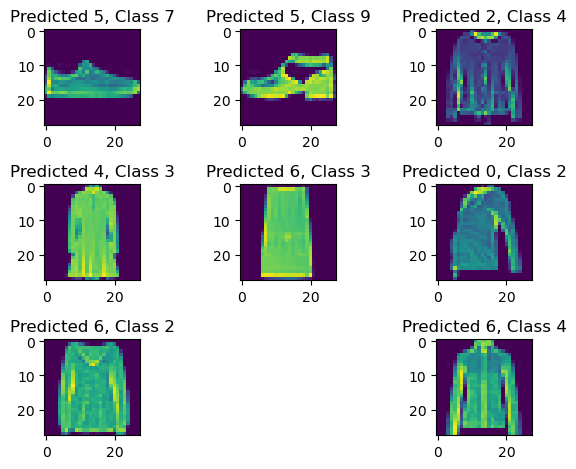

In [140]:
not_correct = np.where(pred!=y_test)[0]
print ("Found %d not correct labels" % len(not_correct),"out of 10000")
for i, not_correct in enumerate(not_correct[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(X_test[not_correct].reshape(28,28),  interpolation='none')
 plt.title("Predicted {}, Class {}".format(pred[not_correct], y_test[not_correct]))
 plt.tight_layout()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___